<a href="https://colab.research.google.com/github/birajsth/MachineLearning-with-tensorflow/blob/master/basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()

import numpy as np
import matplotlib.pyplot as plt


### Importing Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories.
We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Adding class_names
The labels are an array of integers, ranging from 0 to 9. Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see the pixel values in the range of 0 to 255.

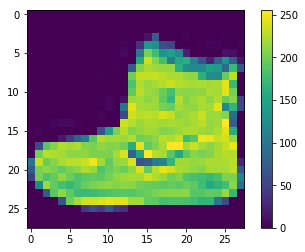

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Scaling the values to range of 0 to 1.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

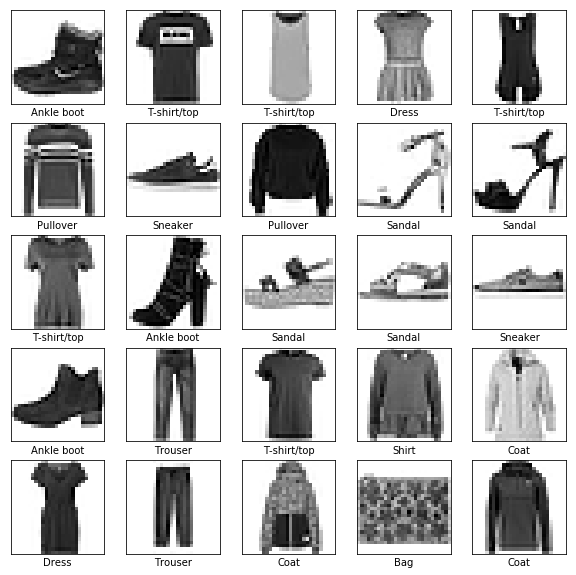

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building the model
Building the neural network requires configuring the layers of the model, then compiling the model.


### Setup the layers
The basic building block fo a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists together simple layers. Most layers, like 

```
tf.keras.layers.Dense
```
,have parameters that are learned during training.



In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


The first layer in this network,  tf.keras.layeres.Flatten,  transforms the format of the images form a 2d-arrray (of 28 by 28 pixels), to a 1d-array of 28*28=784 pixels.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 neurons. The second layer is a 10-node softmax layer- this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Train the model
Model is trained by feeding the training data to the model -in this example,  train_images and train_labels arrays.
The model learns to associate images and labels.

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.4971 - acc: 0.8254
Epoch 2/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.3766 - acc: 0.8625
Epoch 3/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3382 - acc: 0.8748
Epoch 4/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3125 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2943 - acc: 0.8918


### Evaluate accuracy


In [10]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3485 - acc: 0.8731
Test accuracy: 0.8730999827384949
Test loss: 0.34850876817703247


### Make predictions
With the model trained, we can use it to make predictionns about some images.


In [0]:
predictions = model.predict(test_images)

In [13]:
predictions[0]

array([1.4729361e-06, 9.4388575e-10, 7.0534114e-08, 2.0103937e-07,
       9.3177738e-07, 9.7830975e-03, 5.6626536e-06, 2.3749972e-02,
       4.9455139e-07, 9.6645808e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

We can graph this to look at the full set of 10 channels


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

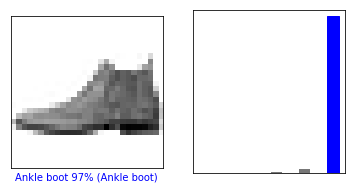

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

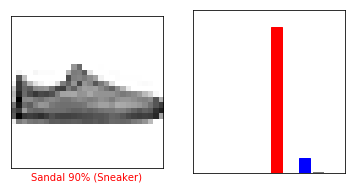

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

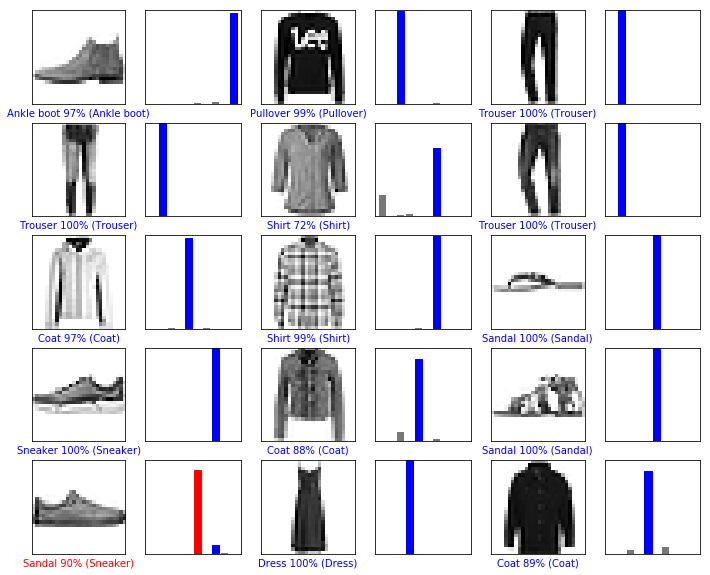

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [37]:
img = test_images[0]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
print(predictions_single)


[[1.4729375e-06 9.4388575e-10 7.0534114e-08 2.0103955e-07 9.3177738e-07
  9.7830826e-03 5.6626536e-06 2.3749972e-02 4.9455093e-07 9.6645808e-01]]


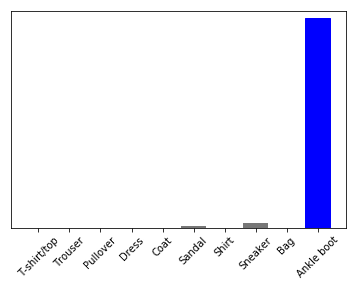

In [38]:
plot_value_array(0, predictions_single, test_labels)
_= plt.xticks(range(10), class_names, rotation=45)